### 載入工具

In [1]:
import os
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(1)

Using TensorFlow backend.


### 資料：訓練集、標籤集

(200, 2)
[ 0.62434536 -1.6117564 ] [0. 1.]
[0.5991218 1.8240056] [1. 0.]


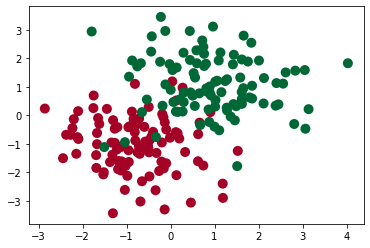

In [2]:
# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(-1*n_data, 1)     # class0 x shape=(100, 2)
y0 = np.zeros((100, 2))                 # class0 y shape=(100, 2)
y0[:,1] = 1                             # [[0, 1], ..., [0, 1]]
x1 = np.random.normal(1*n_data, 1)      # class1 x shape=(100, 2)
y1 = np.zeros((100, 2))                 # class0 y shape=(100, 2)
y1[:,0] = 1                             # [[1, 0], ..., [1, 0]]
x_train = np.vstack((x0, x1))           # shape (200, 2) + some noise
y_train = np.vstack((y0, y1))           # shape (200, )
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
print(y_train.shape)
print(x_train[0], y_train[0])
print(x_train[100], y_train[100])

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train[:,0].reshape(200,), s=100, lw=0, cmap='RdYlGn')
plt.show()

### 建構 Model

In [25]:
model = Sequential()

model.add(Dense(input_dim=2, units=2, activation='softmax'))

model.compile(loss=('categorical_crossentropy'), optimizer=Adam(lr=0.01), metrics=['accuracy'])

### 訓練

In [26]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5164 - acc: 0.8900
Epoch 2/10
200/200 [==============================] - 0s 28us/step - loss: 0.4686 - acc: 0.9050
Epoch 3/10
200/200 [==============================] - 0s 26us/step - loss: 0.4274 - acc: 0.9250
Epoch 4/10
200/200 [==============================] - 0s 23us/step - loss: 0.3920 - acc: 0.9250
Epoch 5/10
200/200 [==============================] - 0s 25us/step - loss: 0.3635 - acc: 0.9250
Epoch 6/10
200/200 [==============================] - 0s 20us/step - loss: 0.3401 - acc: 0.9250
Epoch 7/10
200/200 [==============================] - 0s 17us/step - loss: 0.3204 - acc: 0.9300
Epoch 8/10
200/200 [==============================] - 0s 21us/step - loss: 0.3044 - acc: 0.9350
Epoch 9/10
200/200 [==============================] - 0s 16us/step - loss: 0.2904 - acc: 0.9300
Epoch 10/10
200/200 [==============================] - 0s 14us/step - loss: 0.2792 - acc: 0.9300


### 預測新資料

[[0.1310097  0.86899024]]


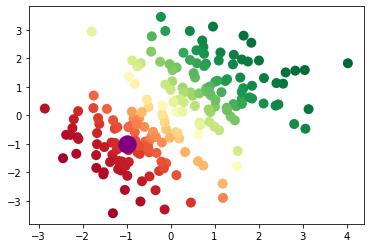

In [27]:
# 預測新資料
x_new = np.array([[-1, -1]])
p_new = model.predict(x_new)
print(p_new)

# 畫圖
p_ = model.predict(x_train)
plt.scatter(x_train[:, 0], x_train[:, 1], c=p_[:,0].reshape(200, ), s=100, lw=0, cmap='RdYlGn')
plt.scatter(x_new[0, 0], x_new[0, 1], c='purple', s=300)
plt.show()